In [1]:
import numpy as np
import pandas as pd
from matplotlib.patches import FancyBboxPatch
import matplotlib.pyplot as plt
from scipy.stats import pearsonr   

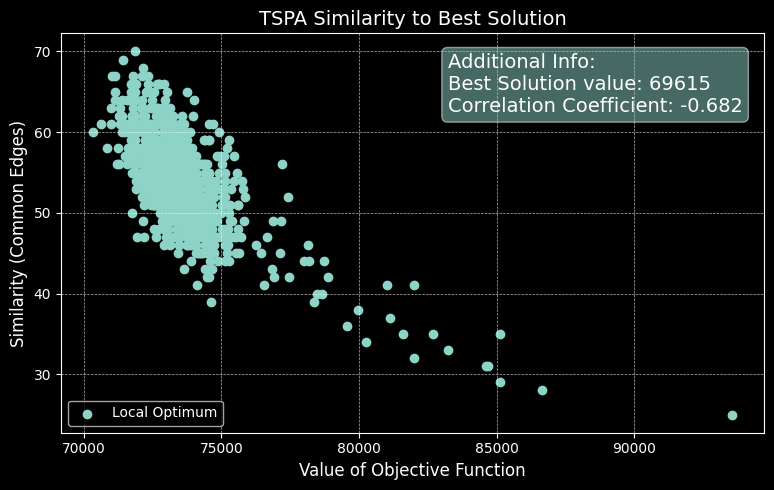

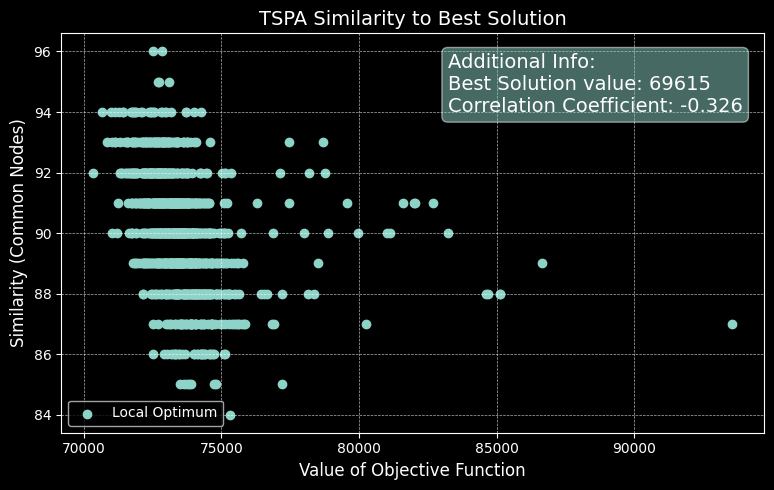

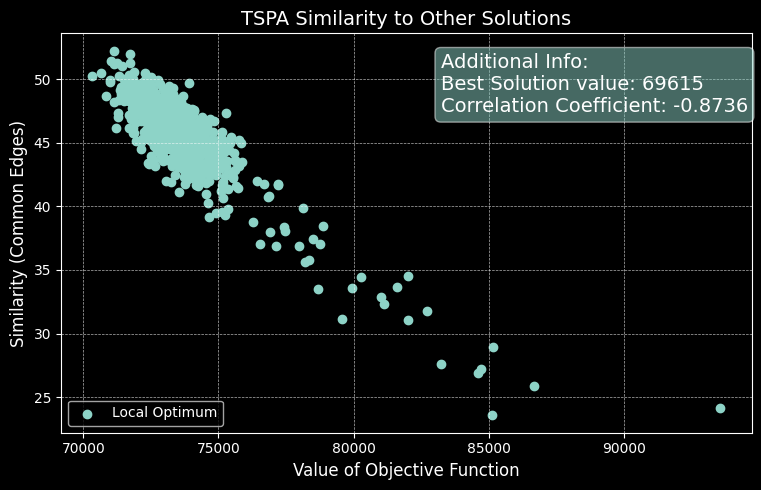

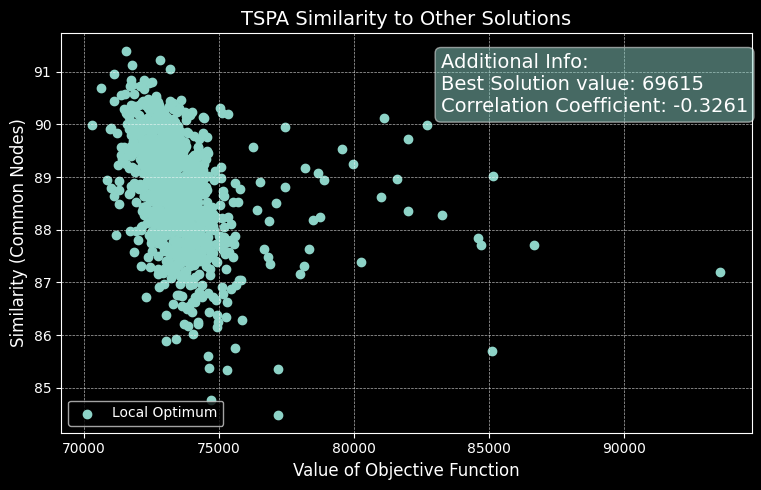

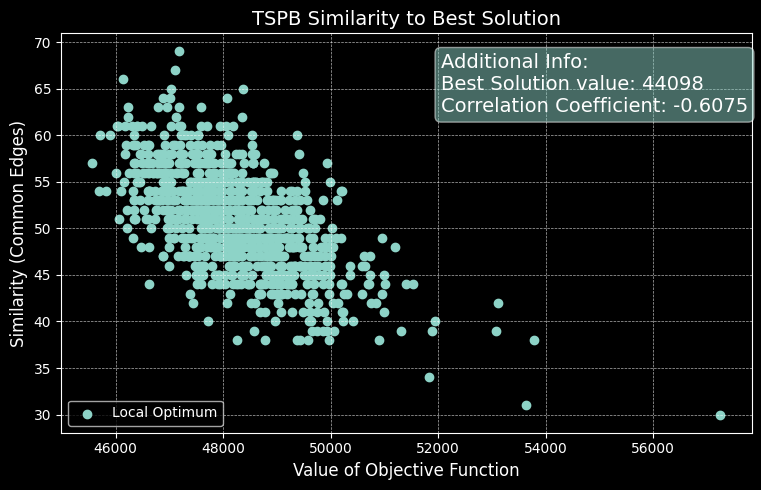

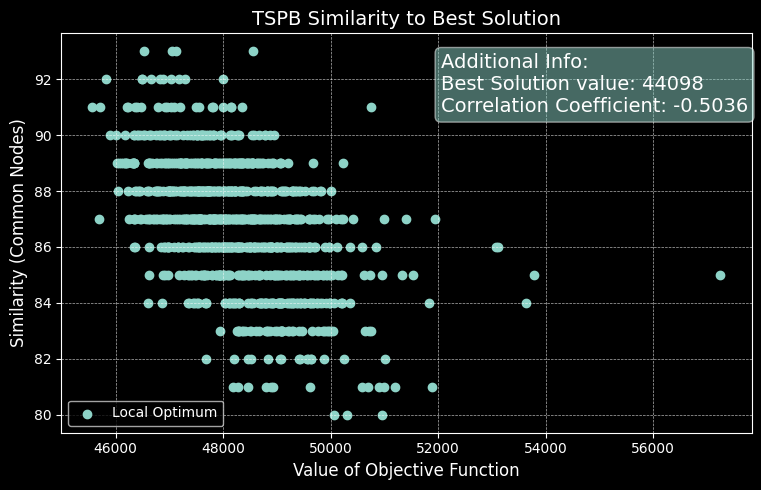

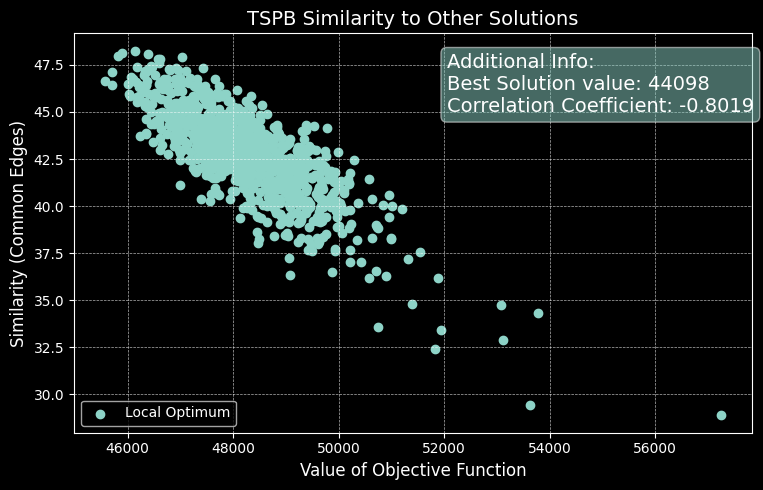

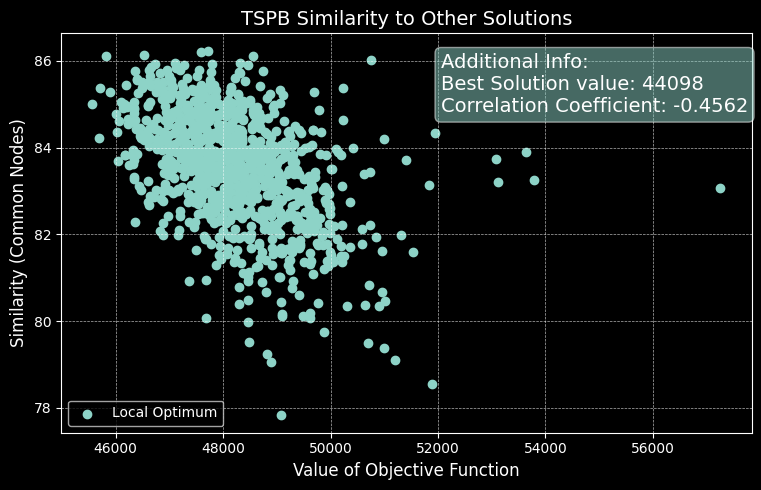

In [20]:
for instance in ["TSPA", "TSPB"]:
    best_edges = pd.read_csv(
        f"./data/convexity/{instance}.csv_best_edges.txt", header=None
    ).to_numpy()
    best_nodes = pd.read_csv(
        f"./data/convexity/{instance}.csv_best_nodes.txt", header=None
    ).to_numpy()
    intra_edges = pd.read_csv(
        f"./data/convexity/{instance}.csv_intra_edges.txt", header=None
    ).to_numpy()
    intra_nodes = pd.read_csv(
        f"./data/convexity/{instance}.csv_intra_nodes.txt", header=None
    ).to_numpy()
    solutions = pd.read_csv(
        f"./data/convexity/{instance}.csv_solutions.txt", header=None
    ).to_numpy()
    best_sol = solutions[0][0]
    solutions = solutions[1:]
    x = [best_edges, best_nodes, intra_edges, intra_nodes]
    titles = [
        "Similarity to Best Solution",
        "Similarity to Best Solution",
        "Similarity to Other Solutions",
        "Similarity to Other Solutions",
    ]
    ylabels = [
        "Similarity (Common Edges)",
        "Similarity (Common Nodes)",
        "Similarity (Common Edges)",
        "Similarity (Common Nodes)",
    ]
    for k in range(4):
        c = round(pearsonr(solutions, x[k])[0][0], 4)
        plt.figure(figsize=(8, 5))
        plt.scatter(
            solutions,
            x[k],
            marker="o",
            label="Local Optimum",
        )
        info_text = (
            "Additional Info:\n"
            f"Best Solution value: {best_sol}\n"
            f"Correlation Coefficient: {c}"
        )
        props = dict(boxstyle="round", alpha=0.5)
        ax = plt.gca()
        ax.text(
            0.55,
            0.95,
            info_text,
            transform=ax.transAxes,
            fontsize=14,
            verticalalignment="top",
            bbox=props,
        )
        # plt.text(1, 20, info_text, fontsize=10, va="top", ha="left")
        plt.title(f"{instance} {titles[k]}", fontsize=14)
        plt.xlabel("Value of Objective Function", fontsize=12)
        plt.ylabel(ylabels[k], fontsize=12)
        plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
        plt.legend(fontsize=10)
        plt.tight_layout()

        plt.show()
        # break